# Internal Lab 



# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [232]:
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import seaborn as sns
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [206]:
df = pd.read_csv('petrol.csv')
df.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [207]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [208]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [209]:
df_out=df[(~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))).all(axis=1)]
df_out.shape
# 5 outlier data removed

(43, 5)

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

In [210]:
df_attr=df_out.iloc[:,0:4]
df_attr.head()

,tax,income,highway,dl
0,9.0,3571,1976,0.525
1,9.0,4092,1250,0.572
2,9.0,3865,1586,0.580
3,7.5,4870,2351,0.529
4,8.0,4399,431,0.544


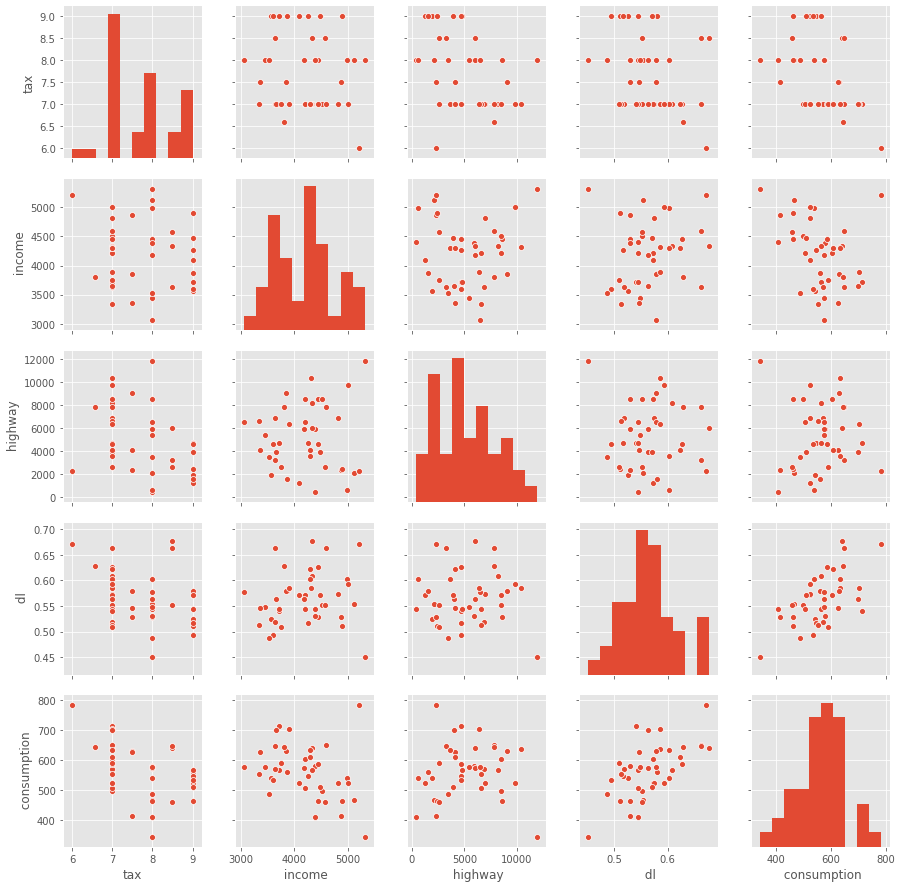

In [211]:
sns.pairplot(df_out)

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.

As number of drivers is more consumption is more

All independent variables other than number of drivers is having multi modal values

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [233]:
# Copy all the independent attributes into X dataframe and dependent value consumption into y dataframe
X = df_out.drop([' income',' highway',' consumption'], axis=1)
 
y = df_out[' consumption']

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Training data shape : (%.0f,%.0f)' %X_train.shape )
print('Test data shape : (%.0f,%.0f)' %X_test.shape )


Training data shape : (34,2)
Test data shape : (9,2)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [235]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [215]:
col_names=['Features','Coefficients']
reg_df=pd.DataFrame(columns=col_names)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
    reg_df=reg_df.append({'Features':col_name,'Coefficients':regression_model.coef_[idx]},ignore_index=True)

#pd.DataFrame(reg_df)
reg_df

The coefficient for tax is -30.70924254754727
The coefficient for  dl is 892.8862087487333


,Features,Coefficients
0,tax,-30.709243
1,dl,892.886209


In [236]:
print("The intercept for our model is {}".format(regression_model.intercept_))
# consumption = -30.71 * tax + 892.89 * dl + 292.55

The intercept for our model is 292.55096524614896


# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [237]:
regression_model.score(X_test, y_test)

0.2876056314158515

In [242]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

69.02352698398606

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [243]:
X = df_out.drop([' consumption'], axis=1)
 
y = df_out[' consumption']

In [244]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
print('Training data shape : (%.0f,%.0f)' %X_train.shape )
print('Test data shape : (%.0f,%.0f)' %X_test.shape )

Training data shape : (34,4)
Test data shape : (9,4)


In [245]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [246]:
col_names=['Features','Coefficients']
reg_df=pd.DataFrame(columns=col_names)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
    reg_df=reg_df.append({'Features':col_name,'Coefficients':regression_model.coef_[idx]},ignore_index=True)

#pd.DataFrame(reg_df)
reg_df

The coefficient for tax is -39.411583621415424
The coefficient for  income is -0.06262814005687901
The coefficient for  highway is -0.0030219870395790096
The coefficient for  dl is 950.8827441430783


,Features,Coefficients
0,tax,-39.411584
1,income,-0.062628
2,highway,-0.003022
3,dl,950.882744


In [247]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

45.309689468984025

# Question 9: Print the coefficients of the multilinear regression model

In [248]:
reg_df

,Features,Coefficients
0,tax,-39.411584
1,income,-0.062628
2,highway,-0.003022
3,dl,950.882744


In [249]:
print("The intercept for our model is {}".format(regression_model.intercept_))
# consumption = -39.41 * tax + (-.063) * income + (-.003) * highway + 950.88 * dl + 607.72

The intercept for our model is 607.7189089086938


In [250]:
regression_model.score(X_test, y_test)

0.6930212207091808

In [251]:
df.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [226]:
# --- Iteration 2 using scaled values -----
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
df_scaled = preprocessing.scale(df_out)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled.head()

,tax,income,highway,dl,consumption
0,1.571322,-1.117080,-1.179576,-0.810311,-0.276770
1,1.571322,-0.172027,-1.444400,0.129241,-0.474927
2,1.571322,-0.583787,-1.321837,0.289164,-0.043643
3,-0.257445,1.239203,-1.042787,-0.730349,-1.757120
4,0.352144,0.384846,-1.743147,-0.430492,-1.803746


In [227]:
X = df_scaled.drop(' consumption', axis=1)

y = df_scaled[[' consumption']]

In [228]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [229]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [230]:
col_names=['Features','Coefficients']
reg_df=pd.DataFrame(columns=col_names)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))
    reg_df=reg_df.append({'Features':col_name,'Coefficients':regression_model.coef_[0][idx]},ignore_index=True)

#pd.DataFrame(reg_df)
reg_df

The coefficient for tax is -0.37680585999385385
The coefficient for  income is -0.40245022787733936
The coefficient for  highway is -0.09656801803997396
The coefficient for  dl is 0.5544536967155864


,Features,Coefficients
0,tax,-0.376806
1,income,-0.402450
2,highway,-0.096568
3,dl,0.554454


In [253]:
regression_model.score(X_test, y_test)

0.6930212207091808

In [259]:
mse = np.mean((regression_model.predict(X_test)-y_test)**2)
math.sqrt(mse)

45.309689468984025

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

### RMSE is very high when considering 2 features of tax and dl
### RMSE improved when considering all 4 features but still it is very high  showing our model is failing to account for important features underlying our data
### RMSE remains the same using scaled data and there is no significance results achieved through it

### Model score improved when considering all features instead of 2